####**PCA**


We have 8 features by which we would like to classify into classes, but classification with a large feature space can complicate the classification.That is why we would like to reduce the dimension, that is, leave as few features as possible to classify by omitting other features.

When we come to do PCA and download unnecessary features. It is quite clear to us that the MMSE feature will remain because so far it has proven itself to be well classified by the various charts.
The question is which other features will remain, and which features will be dropped.
According to what we have seen so far visually the features that are more successful in classifying are sex(M/F), education(EDUC), NWBV and of course MMSE.
But the question is whether to keep them, lower some of them, or maybe even take other features that in combination with other features do result in good classifier performance. For example Age-MMSE.



First of all we would like to find what is the optimal number of features that we should take. For this purpose, we calculate the cumulative explained variance as more components are added. We want to retain enough components to capture a significant portion of the total variance but keep their number to a minimum.

In [ ]:
scaler = StandardScaler()
alzheimer_standardized = scaler.fit_transform(alzheimers_data_without_Group)

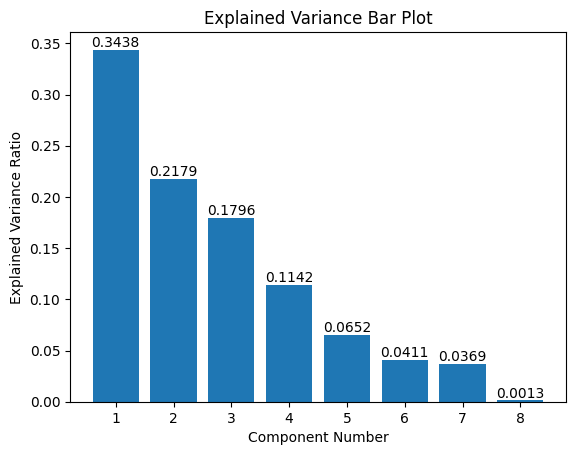

In [ ]:
# Performing PCA
pca = PCA()
pca.fit(alzheimer_standardized)

explained_variances = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variances)+1), explained_variances, align='center')
for i, explained_variance in enumerate(explained_variances):
    plt.text(i + 1, explained_variance, f'{explained_variance:.4f}', ha='center', va='bottom')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Bar Plot')
plt.show()

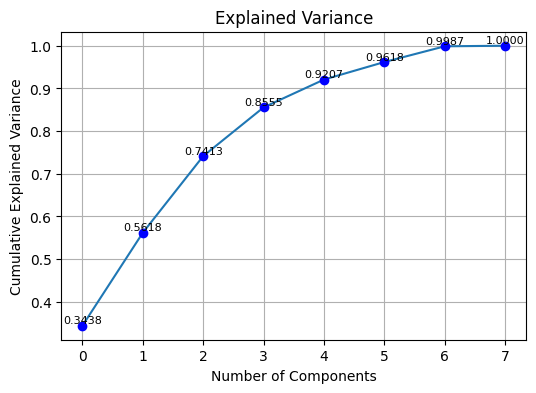

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(6, 4))
plt.plot(cumulative_variance)

for i in range(len(cumulative_variance)):
    plt.plot(i, cumulative_variance[i], 'bo')
    plt.text(i, cumulative_variance[i], f'{cumulative_variance[i]:.4f}', fontsize=8, va='bottom', ha='center')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance')
plt.grid()
plt.show()

The 'elbow' point in the explained variance plot occurs at 7 components. Beyond this point, the marginal gain in explained variance diminishes, indicating that additional components provide only marginal benefits in capturing additional information. At 6 components, we achieve the highest explained variance.

However, considering the trade-off between capturing sufficient variance and maintaining interpretability and computational efficiency, we choose to proceed with 5 components. This configuration still captures a substantial 92% of the total variance, and strikes a balance between informativeness and practicality. This decision ensures that the model remains interpretable and computationally feasible without significantly sacrificing the quality of information retained.

we will re-run the PCA with 5 components

In [ ]:
pca = decomposition.PCA(n_components=5)
pca.fit(alzheimer_standardized)

PCA(n_components=5)

The date Frame pca_df includes the various PCs and the Group classification column.

After we received the components. We will try to understand the contribution of each original variable to the principal components.

We will create a DataFrame df_loadings where the rows represent the original variables, and the columns represent the principal components.

In [ ]:
loadings = pca.components_.T
loadings = loadings[:, :5]
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5'], index=alzheimers_data_without_Group.columns)
df_loadings

,PC1,PC2,PC3,PC4,PC5
M/F,-0.421662,0.184537,-0.251034,0.086163,-0.792311
Age,-0.107307,0.219847,0.649258,-0.434521,0.033899
EDUC,-0.271068,-0.521943,0.232602,0.305931,-0.126453
SES,0.268433,0.492258,-0.319821,-0.294511,-0.106355
MMSE,0.030940,-0.485774,0.001582,-0.736220,-0.313654
eTIV,-0.552485,0.048928,-0.212770,-0.186537,0.318799
nWBV,0.241883,-0.401053,-0.515717,-0.116597,0.158772
ASF,0.548131,-0.060473,0.218675,0.181729,-0.344344


In [ ]:
for i in range(5):
    print(f"PC{i+1} = ", end=' ')
    for j in range(8):
      if j == 0:
        print(f"({pca.components_[i][j]:.2f})*{alzheimers_data_without_Group.columns.tolist()[j]}", end=' ')
      else:
        print(f"+ ({pca.components_[i][j]:.2f})*{alzheimers_data_without_Group.columns.tolist()[j]}", end=' ')
    print()

PC1 =  (-0.42)*M/F + (-0.11)*Age + (-0.27)*EDUC + (0.27)*SES + (0.03)*MMSE + (-0.55)*eTIV + (0.24)*nWBV + (0.55)*ASF 
PC2 =  (0.18)*M/F + (0.22)*Age + (-0.52)*EDUC + (0.49)*SES + (-0.49)*MMSE + (0.05)*eTIV + (-0.40)*nWBV + (-0.06)*ASF 
PC3 =  (-0.25)*M/F + (0.65)*Age + (0.23)*EDUC + (-0.32)*SES + (0.00)*MMSE + (-0.21)*eTIV + (-0.52)*nWBV + (0.22)*ASF 
PC4 =  (0.09)*M/F + (-0.43)*Age + (0.31)*EDUC + (-0.29)*SES + (-0.74)*MMSE + (-0.19)*eTIV + (-0.12)*nWBV + (0.18)*ASF 
PC5 =  (-0.79)*M/F + (0.03)*Age + (-0.13)*EDUC + (-0.11)*SES + (-0.31)*MMSE + (0.32)*eTIV + (0.16)*nWBV + (-0.34)*ASF 


For PC1 the most influential features are eTIV and ASF which are 0.55 and M/F is next with 0.41

For PC2 the most influential features are EDUC which is 0.52 and the feature SES with 0.48 and MMSE with 0.46

For PC3 the most influential features are AGE with 0.65 and from nWBV which is 0.5

For PC4 the most influential features are MMSE with 0.75 and AGE with 0.42

For PC5 the most influential feature is M/F with 0.8



In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance = np.insert(explained_variance, 0, 0)
#Preparing the cumulative variance data
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3','PC4','PC5'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.343828,0.344
2,PC2,0.217928,0.562
3,PC3,0.179580,0.742
4,PC4,0.114182,0.856
5,PC5,0.065151,0.921


The data frame df_explained_variance contains for each component its variance and cumulative variance

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_explained_variance['PC'], y=df_explained_variance['Cumulative Variance'], marker=dict(size=15, color="LightSeaGreen")))

fig.add_trace(go.Bar(x=df_explained_variance['PC'], y=df_explained_variance['Explained Variance'], marker=dict(color="RoyalBlue")))

fig.update_layout(width=800,height=500)
fig.show()

In the upper graph you can see the cumulative variance after adding each component and the variance of the component itself.
We will note that the cumulative variance at the end is 92 percent.
And each component has a greater variance than the next component.


Since we have 5 components it is impossible to see this visually.
Therefore we will try to understand only from the first 2 components.

In [ ]:
scores = pca.transform(alzheimer_standardized)
pca_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3','PC4','PC5'])
pca_df['Group'] = alzheimers_data['Group']
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,Group
0,-3.715446,1.158461,-0.006925,-1.154822,0.784098,0
1,-3.880725,0.916162,0.255897,-1.860239,0.488466,0
2,-1.499485,1.187701,-1.118049,0.619057,0.399546,1
3,-1.949968,0.762671,-0.841918,-0.590963,0.031303,1
4,-1.918118,1.867262,-0.250633,0.629183,0.433818,1


In [ ]:
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Group')
fig.show()

We only saw PC1 and PC2 in the graph
Because they are the couple that will contribute the most. (Their cumulative variance is 0.52, which is the most).

We can see here that it's not quite orderly and there are a lot of overlapping points, but there is an imperfect distribution of color that ends up signifying Denented  or Nondemented.

We will calculate influential features in a dataset using (PCA) by summing the absolute loadings of each feature across all principal components. Features with higher total loadings are considered more influential. We will extract the 5 most influential features.

In [ ]:
loadings = pca.components_
loading_features = list()

for feature_index, feature_name in enumerate(alzheimers_data.columns):
    # We calculate the total absolute loading for the feature across all PCs
    total_loading = np.sum(np.abs(loadings[:, feature_index-1]))
    loading_features.append((total_loading, feature_name))

loading_features.sort(reverse=True)
print("Influential Features:")
loading_features[:]

Influential Features:


[(1.7357063622459654, 'M/F'),
 (1.5681709767644367, 'MMSE'),
 (1.4813777462259654, 'SES'),
 (1.4579966076397735, 'EDUC'),
 (1.4448325458355442, 'Age'),
 (1.4340222330416723, 'nWBV'),
 (1.353351971297049, 'Group'),
 (1.353351971297049, 'ASF'),
 (1.3195190192073936, 'eTIV')]

The features that most affected the components in descending order are:
 - M/F
 - MMSE
 - SES
 - EDUC
 - Age
 - nWBV
 - ASF
 - eTIV

####**Extracting the most important features**

After we have done PCA we can start building models.

But because we also want to understand where the models will go wrong. What caused them to go wrong, is the problem with the data or the model, and so on and so forth. We will have trouble inferring all these things from the PCA, so we will want to test with other algorithms what the 5 most important features are. These features will be extracted into a separate data frame and classified accordingly.

In the end, we will run the models on 2 data frames:

1. PCA
2. On important features that we have extracted by other algorithms

 - We use the Chi-square statistical test to select the 5 most influential features for prediction. It ranks these traits based on their chi-squared scores.

 - We will calculate the degrees of correlation between vfeatures and Group. We will extract the features that are most strongly correlated with Group.

According to these results we will choose the five influential features.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=5)  # Select the top 5 features
Group = alzheimers_data["Group"]
X_new = selector.fit_transform(alzheimers_data_without_Group, Group)
selected_indices = selector.get_support(indices=True)
selected_feature_names = [alzheimers_data_without_Group.columns.tolist()[i] for i in selected_indices]
selected_scores = selector.scores_[selected_indices]

feature_scores = list(zip(selected_feature_names, selected_scores))
feature_scores_sorted = sorted(feature_scores, key=lambda x: x[1], reverse=True)
sorted_feature_names = [feature[0] for feature in feature_scores_sorted]

print("The sorted feature names by influence:")
for feature, score in feature_scores_sorted:
    print(f"{feature}: {score}")

Sorted Feature Names by Influence:
MMSE: 42.2077214877527
eTIV: 10.503282424720426
M/F: 9.570174287550472
EDUC: 5.769134971631615
SES: 0.14945273581974416


In [ ]:
correlation_matrix = alzheimers_data.corr()
correlation_with_target = correlation_matrix['Group'][1:6].abs().sort_values(ascending=False)

print("The features and their correlation with target:")
print(correlation_with_target)

The features and their correlation with target:
MMSE    0.537988
M/F     0.212467
EDUC    0.173719
SES     0.028711
Age     0.008981
Name: Group, dtype: float64


The most influential features according to SelectKBest are:
 - MMSE
 - eTIV
 - M/F
 - EDUC
 - SES

The most influential features according to correlation_matrix are:
 - MMSE
 - M/F    
 - EDUC    
 - SES   
 - Age    

MMSE, M/F, EDUC, SES were defined as highly influential by both algorithms
So we were left with the age and the eTIV.

But eTIV is ranked second by SelectKBest. And age is in fifth place according to the correlation matrix. Therefore we will prefer eTIV.

**In conclusion**, we are left with the 5 features:
MMSE, M/F, EDUC, SES, eTIV.

Let's define the date frames
1. `pca_df` - for the PCA
3. `best_features_df` - On important features that we extracted by other algorithms

In [ ]:
pca_df
best_features_df = alzheimers_data[['Group', "M/F", "MMSE", "SES", "EDUC", "eTIV"]]

#####Dividing data
Dividing data into training and test sets is a critical step in machine learning to evaluate the performance of a model on unseen data

In [ ]:
extract_group = best_features_df.drop('Group', axis=1)
extract_group[extract_group.columns] = scaler.fit_transform(extract_group[extract_group.columns])
extract_group["Group"] = best_features_df['Group']
best_features_df = extract_group

It is an important preprocessing step to ensure that any inherent order in the data doesn't affect the learning process so we will shuffle the data.

In [ ]:
pca_df = pca_df.sample(frac=1, random_state=50).reset_index(drop=True)
best_features_df = best_features_df.sample(frac=1, random_state=50).reset_index(drop=True)

split the data

In [ ]:
from sklearn.model_selection import train_test_split
pca_df_train, pca_df_test, pca_group_train, pca_group_test = train_test_split(pca_df.drop('Group', axis=1),
                                                                              pca_df['Group'],
                                                                              test_size=0.2,
                                                                              random_state=40)
best_features_df_train, best_features_df_test, best_features_group_train, best_features_group_test = train_test_split(best_features_df.drop('Group', axis=1),
                                                                                                                      best_features_df['Group'],
                                                                                                                      test_size=0.2,
                                                                                                                      random_state=42)

verifying the split by checking the dimensions of the resulting training and testing sets.

In [ ]:
print(f"Training set (features) shape: {pca_df_train.shape}")
print(f"Testing set (features) shape: {pca_df_test.shape}")
print(f"Training set (target) shape: {pca_group_train.shape}")
print(f"Testing set (target) shape: {pca_group_test.shape}")

Training set (features) shape: (293, 5)
Testing set (features) shape: (74, 5)
Training set (target) shape: (293,)
Testing set (target) shape: (74,)


In [ ]:
print(f"Training set (features) shape: {best_features_df_train.shape}")
print(f"Testing set (features) shape: {best_features_df_test.shape}")
print(f"Training set (target) shape: {best_features_group_train.shape}")
print(f"Testing set (target) shape: {best_features_group_test.shape}")

Training set (features) shape: (293, 5)
Testing set (features) shape: (74, 5)
Training set (target) shape: (293,)
Testing set (target) shape: (74,)
